## 0. Introduction

The purpose of this notebook is to explore stochastic differential equations (SDEs) with reference to chapter 6 from *Stochastic Calculus for Finance II Continuous-Time Models* (Shreve, 2008).

## 1. The Concept of Stochastic Differential Equations

There are two ways to compute a derivative security price: (1) use Monte Carlo simulation to generate paths of the underlying security or securities under the risk-neutral measure and use these paths to estimate the (risk-neutral) expected discounted payoff; or (2) numerically solve a partial differential equation (PDE). Stochastic differential equations (SDEs) are used to model asset prices. Solutions to SDEs have the Markov property and because of this, related to each SDE there are two PDEs, one that includes discounting and one that does not.

An SDE is an equation of the form

$$ dX(u) = \beta(u, X(u)) \, du + \gamma(u, X(u)) \, dW(u). \tag{1.1} $$

Here $\beta(u, x)$ and $\gamma(u, x)$ are given functions, called the **drift** and **diffusion**, respectively. In addition to this equation, an *initial condition* of the form $X(t) = x$, where $t \geq 0$ and $x \in \mathbb{R}$, is specified. The problem is then to find a stochastic process $X(T)$, defined for $T \geq t$, such that

$$ X(t) = x, \tag{1.2} $$

$$ X(T) = X(t) + \int_{t}^{T} \beta(u, X(u)) \, du + \int_{t}^{T} \gamma(u, X(u)) \, dW(u). \tag{1.3} $$

Under mild conditions on the functions $\beta(u, x)$ and $\gamma(u, x)$, there exists a unique process $X(T), T \geq t$, satisfying equations (1.2) and (1.3). However, this process can be difficult to determine explicitly because it appears on both the left- and right-hand sides of equation (1.3).

The solution $X(T)$ at time $T$ will be $\mathcal{F}(T)$-measurable (i.e., $X(T)$ only depends on the path of the Brownian motion up to time $T$). In fact, since the initial condition $X(t) = x$ is specified, all that is really needed to determine $X(T)$ is the path of the Brownian motion between times $t$ and $T$.

Although SDEs are, in general, difficult to solve, a *one-dimensional linear SDE* can be solved explicitly. This is an SDE of the form

$$ dX(u) = \left(a(u) + b(u) X(u)\right) \, du + \left(\gamma(u) + \sigma(u) X(u)\right) \, dW(u), \tag{1.4} $$

where $a(u), b(u), \gamma(u)$, and $\sigma(u)$ are nonrandom functions of time. Indeed, this equation can even be solved when $a(u), b(u), \gamma(u)$, and $\sigma(u)$ are adapted random processes, although it is then no longer of the form in equation (1.1). In order to guarantee that the solution to equation (1.1) has the **Markov property**, the only randomness we permit on the right-hand side of (1.1) is the randomness inherent in the solution $X(u)$ and in the driving Brownian motion $W(u)$. There cannot be additional randomness such as would occur if any of the processes $a(u)$, $b(u)$, $\gamma(u)$, and $\sigma(u)$ appearing in equation (1.4) were themselves random.


## 2. Connections with Partial Differential Equations

### 2.1 The Euler Method

Consider the SDE in equation (1.1). Let $0 \leq t \leq T$ be given, and let $h(y)$ be a Borel-measurable function. Denote by

$$ g(t, x) = \mathbb{E}^{t,x} h(X(T)) \tag{2.1.1} $$

The expectation of $h(X(T))$, where $X(T)$ is the solution to (1.1) with initial condition $X(t) = x$. (We assume that $\mathbb{E}^{t,x} \mid h(X(T)) \mid < \infty$.) Note that there is nothing random about $g(t, x)$; it is an ordinary (actually, Borel-measurable) function of the two dummy variables $t$ and $x$.

If we do not have an explicit formula for the distribution of $X(T)$, we could compute $g(t, x)$ numerically by beginning at $X(t) = x$ and simulating the SDE. One way to do this would be to use the **Euler method**, a particular type of Monte Carlo method: choose a small positive step size $\delta$, and then set

$$ X(t + \delta) = x + \beta(t, x) \delta + \gamma(t, x) \sqrt{\delta} \, \epsilon_1, $$

where $\epsilon_1$ is a standard normal random variable. Then set

$$ X(t + 2\delta) = X(t + \delta) + \beta \left(t + \delta, X(t + \delta) \right) \delta + \gamma \left(t + \delta, X(t + \delta) \right) \sqrt{\delta} \, \epsilon_2, $$

where $\epsilon_2$ is a standard normal random variable independent of $\epsilon_1$. By this device, one eventually determines a value for $X(T)$ (assuming $\delta$ is chosen so that $\frac{T-t}{\delta}$ is an integer). This gives one realization of $X(T)$ (corresponding to one $\omega$). Now repeat this process many times and compute the average of $h(X(T))$ over all these simulations to get an approximate value for $g(t, x)$. Note that if one were to begin with a different time $t$ and initial value $x$, one would get a different answer (i.e., the answer is a function of $t$ and $x$). This dependence on $t$ and $x$ is emphasized by the notation $\mathbb{E}^{t, x}$ in equation (2.1.1).

Note we have used the Euler method in our code examples in previous notebooks.

### 2.2 The Feynman-Kac Theorem

The Feynman-Kac theorem relates SDEs and PDEs. When this PDE is solved (usually numerically), it produces the function $g(t, x)$ of equation (2.1.1). The Euler method described in the previous section for determining this function converges slowly and gives the function value for only one pair $(t, x)$. Numerical algorithms for solving equation (2.2.1) below converge quickly in the case of one-dimensional $x$ being considered here and give the function $g(t, x)$ for all values of $(t, x)$ simultaneously. The relationship between geometric Brownian motion and the Black-Scholes-Merton PDE is a special case of the relationship between SDEs and PDEs.

The Feynman-Kac theorem states that $g(t, x)$ satisfies the PDE

$$ g_t(t, x) + \beta(t, x) g_x(t, x) + \frac{1}{2} \gamma^2(t, x) g_{xx}(t, x) = 0 \tag{2.2.1} $$

and the terminal condition

$$ g(T, x) = h(x) \text{ for all } x. $$

The general principle behind the proof of the Feynman-Kac theorem is:

1. find the martingale,
2. take the differential, and
3. set the $dt$ term equal to zero.

More detail is provided in Shreve (2008, pp.268-272).

## 3. SDE Examples

### 3.1 Geometric Brownian Motion

We know already that the SDE for geometric Brownian motion is

$$ dS(u) = \alpha S(u) \, du \, + \sigma S(u) \, dW(u). $$

In the notation of equation (1.1), $\beta(u, x) = \alpha x$ and $\gamma(u, x) = \sigma x$. We know the formula for the solution to this SDE when the initial time is zero and the initial position is $S(0)$, namely

$$ S(t) = S(0) \, \exp \left\{\left(\alpha - \frac{\sigma^2}{2}\right) t + \sigma W(t)\right\}. $$

Similarly, for $T \geq t$,

$$ S(T) = S(0) \, \exp \left\{\left(\alpha - \frac{\sigma^2}{2}\right) T + \sigma W(T)\right\}. $$

Dividing $S(T)$ by $S(t)$, we obtain

$$ \frac{S(T)}{S(t)} = \exp \left\{\left(\alpha - \frac{\sigma^2}{2}\right) (T - t) + \sigma(W(T) - W(t)) \right\}. $$

If the initial condition is given at time $t$ rather than at time zero and is $S(t) = x$, then this last equation becomes

$$ S(T) = x \exp \left\{\left(\alpha - \frac{\sigma^2}{2}\right) (T - t) + \sigma(W(T) - W(t)) \right\}. $$

As expected, when we use the initial condition $S(t) = x$, then $S(T)$ depends only on the path of the Brownian motion between times $t$ and $T$.

### 3.2 Ornstein–Uhlenbeck Process

The Ornstein-Uhlenbeck process can be considered as a modification of the random walk in continuous time, or Wiener process, in which the properties of the process have been changed so that there is a tendency of the walk to move back towards a central location, with a greater attraction when the process is further away from the center. The Ornstein–Uhlenbeck process can also be considered as the continuous-time analogue of the discrete-time $AR(1)$ process. It is given by the following SDE

$$ dX(u) = -a X(u) \, du + \sigma \, dW(u) $$

where $a$ and $\sigma$ are positive constants. An additional drift term is sometimes added, such as in the Vasicek model which describes the evolution of interest rates. 

#### 3.2.1 Vasicek Model

In the Vasicek model, the interest rate process $R(t)$ is given by the following SDE

$$ dR(u) = a(b -  R(u)) \, du + \sigma \, dW(u) $$

where $a, b$, and $\sigma$ are positive constants. In the notation of equation (1.1), we use the dummy variable $r$ rather than $x$ in this case, and $\beta(u, r) = a(b - r), \gamma(u, r) = \sigma$.

The solution to the SDE can be determined in closed form and is

$$ R(t) = R(0) \, e^{-\alpha t} + \beta \left(1 - e^{-\alpha t}\right) + \sigma e^{-\alpha t} \int_0^t e^{\alpha s} \, dW(s) $$

The proof is provided in Shreve (2008, pp. 150-151).

#### 3.2.2 Cox-Ingersoll-Ross Model

The Cox-Ingersoll-Ross (CIR) model is an extenstion of the Vasicek model. Unlike the Vasicek model, the CIR SDE does not have a closed-form solution, however, the advantage over the Vasicek model is that the interest rate in the CIR model does not become negative. 

In the CIR model, the interest rate process $R(t)$ is given by the SDE

$$ dR(u) = a(b - R(u)) \, du + \sigma \sqrt{R(u)} \, dW(u) $$

where $a, b$, and $\sigma$ are positive constants. In this case, $\beta(u, r) = a(b - r), \gamma(u, r) = \sigma \sqrt{r}$. An interest rate of zero is also precluded if the Feller condition

$$ 2ab \geq \sigma^2$$

is met.

Let's consider an example in Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
# Define simulation parameters
T = 1.0                       # time horizon
N = 252                       # number of steps within time horizon
t = np.linspace(0, T, N+1)    # from 0 to T with N+1 points (inclusive of T)
dt = T / N                    # time step increment
M = 1000                      # number of paths to simulate
R0 = 0.06                     # initial interest rate

In [3]:
# Define CIR model parameters
a = 0.3                       # speed of reversion
b = 0.02                      # long-term mean level 
sigma = 0.025                 # volatility per unit T
print(f"Feller condition is = {2 * a * b > sigma**2}")

# Initialize an array to store the simulated paths
R = np.zeros((N+1, M))
R[0, :] = R0

# Simulate the CIR process
Z = ss.norm.rvs(loc=0, scale=np.sqrt(dt), size=(N,M), random_state=42)
for i in range(1, N+1):
    R[i, :] = R[i-1, :] + a * (b - R[i-1, :]) * dt + sigma * np.sqrt(np.maximum(R[i-1, :], 0)) * Z[i-1, :]

Feller condition is = True


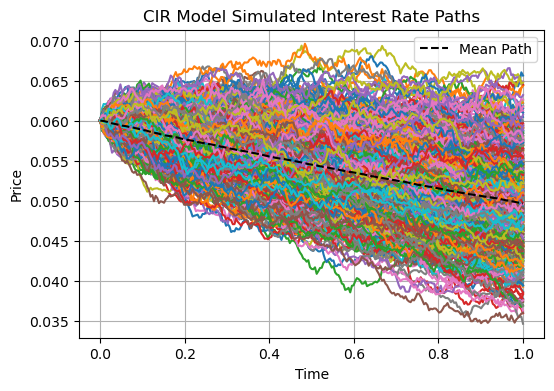

In [4]:
# Plot the simulated interest rate paths
plt.figure(figsize=(6,4))
plt.plot(t, R)
plt.plot(t, np.mean(R, axis=1), color='black', linestyle='dashed', label='Mean Path')
plt.title('CIR Model Simulated Interest Rate Paths')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

### 3.3 Heston Model

The Heston model assumes that $S(t)$, the price of the asset, is determined by the SDE

$$ dS(u) = r S(u) \, du + \sqrt{V(u)} \, S(u) \, dW_1(u), $$

where the interest rate $r$ is constant and the volatility $\sqrt{V}(u)$ is itself a stochastic process governed by the CIR SDE

$$ dV(u) = a(b - V(u)) \, du + \sigma \sqrt{V(u)} \, dW_2(u). $$

The parameters $a, b$ and $\sigma$ are positive constants, and $W_1(u)$ and $W_2(u)$ are correlated Brownian motions with 

$$ dW_1(u) \, dW_2(u) = \rho \, du $$

for some $\rho \in (-1, 1)$. Because the two-dimensional process $(S(t), V(t))$ is governed by the pair of SDEs above, it is a two-dimensional Markov process.

The exact solution is generally complex and involves solving the joint process of $S(t)$ and $V(t)$. For practical purposes, we tend to use numerical methods.

Let's consider an example in Python.

In [5]:
# Define simulation parameters
T = 1.0                                 # time horizon
N = 252                                 # number of steps within time horizon
t = np.linspace(0, T, N+1)              # from 0 to T with N+1 points (inclusive of T)
dt = T / N                              # time step increment
M = 1000                                # number of paths to simulate
S0 = 100.0                              # initial asset price
V0 = 0.2                                # initial variance

In [6]:
# Define Heston model parameters
r = 0.04                                # constant risk-free rate
a = 0.1                                 # speed of variance mean reversion
b = 0.6                                 # long-term mean variance
sigma = 0.05                            # volatility of instantaneous variance
rho = -0.5                              # correlation between W1 and W2
mu = np.array([0, 0])                   # mean vector of W1 and W2
cov = np.array([[1, rho], [rho, 1]])    # covariance matrix between W1 and W2
print(f"Feller condition is = {2 * a * b > sigma**2}")

# Initialize arrays to store the simulated paths
S = np.zeros((N+1, M))
V = np.zeros((N+1, M))
S[0, :] = S0
V[0, :] = V0

# Simulate the Heston process
Z = ss.multivariate_normal.rvs(mean=mu*dt, cov=cov*dt, size=(N,M), random_state=42)
for i in range(1, N+1):    
    V[i, :] = V[i-1, :] + a * (b - V[i-1, :]) * dt + sigma * np.sqrt(np.maximum(V[i-1, :], 0)) * Z[i-1, :, 1]
    S[i, :] = S[i-1, :] * np.exp((r - V[i, :] / 2) * dt + np.sqrt(V[i, :]) * Z[i-1, :, 0])

Feller condition is = True


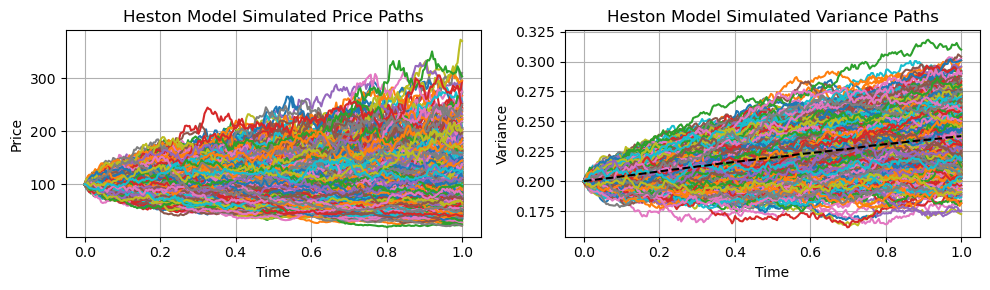

In [7]:
# Plot the simulated price and variance paths
fig, axes = plt.subplots(1, 2, figsize=(10,3))
axes[0].plot(t, S)
axes[0].set_title('Heston Model Simulated Price Paths')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Price')
axes[0].grid(True)
axes[1].plot(t, V)
axes[1].plot(t, np.mean(V, axis=1), color='black', linestyle='dashed', label='Mean Path')
axes[1].set_title('Heston Model Simulated Variance Paths')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Variance')
axes[1].grid(True)
plt.tight_layout()
plt.show()